In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


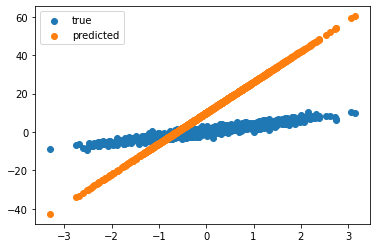

In [52]:
class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)

    def __call__(self, x):
        return self.W * x + self.b

TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

model = Model()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()

In [53]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))


def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)


Epoch 0: Loss: 278.20751953125
Epoch 1: Loss: 172.29034423828125
Epoch 2: Loss: 106.86309051513672
Epoch 3: Loss: 66.44583129882812
Epoch 4: Loss: 41.477386474609375
Epoch 5: Loss: 26.052108764648438
Epoch 6: Loss: 16.52211570739746
Epoch 7: Loss: 10.63406753540039
Epoch 8: Loss: 6.996007919311523
Epoch 9: Loss: 4.748048305511475
Epoch 10: Loss: 3.358962297439575
Epoch 11: Loss: 2.5005576610565186
Epoch 12: Loss: 1.9700664281845093
Epoch 13: Loss: 1.642206072807312
Epoch 14: Loss: 1.439565658569336
Epoch 15: Loss: 1.3143121004104614
Epoch 16: Loss: 1.2368872165679932
Epoch 17: Loss: 1.1890240907669067
Epoch 18: Loss: 1.1594336032867432
Epoch 19: Loss: 1.1411384344100952


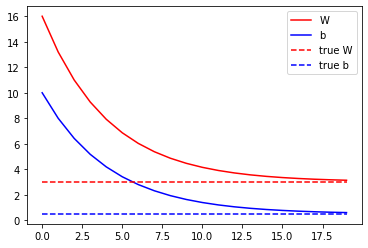

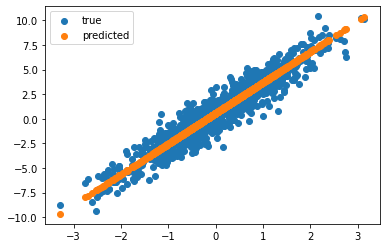

In [54]:
Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy()) # eager execution allows us to do this
    bs.append(model.b.numpy())

    current_loss = loss(y, model(X))

    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.figure()
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()


In [58]:
train(model,X,y)
print(model.W,model.b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.1065807> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5762878>
